In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:
import copy
t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Bmag = t['BTmag']





['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [53]:
print(Source)

        Source        
----------------------
1.1367301994554332e+18
   99583180444752384.0
6.7251384071648348e+18
 2.149593164137238e+18
3.2126194914101847e+18
6.7251458632214118e+18
1.8687432254297426e+18
   99684576032567552.0
 4.395149229245545e+18
6.0034856325847409e+18
                   ...
2.9983479023409853e+18
5.1763029345556787e+18
3.3109516681409459e+18
3.6603709658899282e+18
4.1179490506667576e+18
5.4823776972323082e+18
2.9984534210963241e+18
3.3110001153717335e+18
4.1179762292177428e+18
5.1764038834670981e+18
  3.66051098182383e+18
Length = 50093 rows


In [5]:
# for i in range(0,len(Qfl)):
#     if(Source.mask[i] == False):
#         if(Qfl[i][0] == ord("A")):
#             Jmag.mask[i] = False
#         else:
#             Jmag.mask[i] = True
#         if(Qfl[i][1] == ord("A")):
#             Hmag.mask[i] = False
#         else:
#             Hmag.mask[i] = True
#         if(Qfl[i][2] == ord("A")):
#             Kmag.mask[i] = False
#         else:
#             Kmag.mask[i] = True
print(len(Jmag))
print(len(Jmag.compressed()))

50093
48250


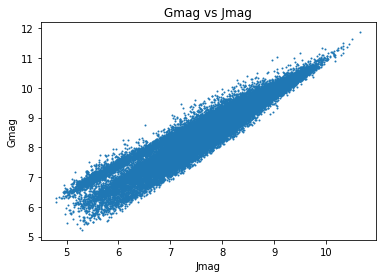

In [4]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()

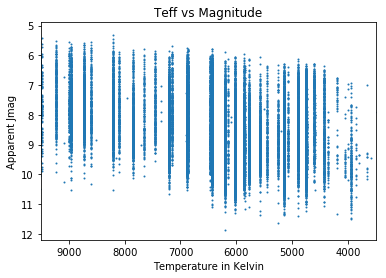

In [5]:
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

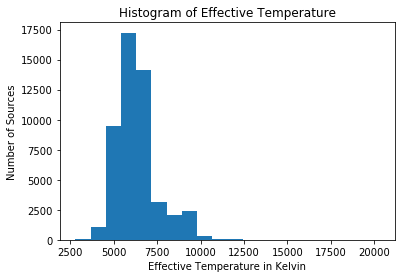

50093


In [6]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()
print(len(Teff))

In [4]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
SPIII = []
temperature = t['Teff']
for i in range(0,len(SpType)):
    if(SpType.mask[i]==False):
        Spc = SpType[i].decode()
        if(len(Spc) > 2):
            for c in range(0,len(Spc)):
                if(Spc[c] == 'V'):
                    Sp[i] = Sp[i] + 5
                if(Sp[c] == 'I'):
                    Sp[i] = Sp[i] + 1
                if(Sp[c] == '+'):
                    Sp[i] = -30
        else:
            Sp[i] = 5.1
        
        if(Sp[i] == 6):
            Sp[i] = 4
        if(Sp[i] > 5.2):
            Sp[i] = -30
        if(Sp[i] == 11):
            Sp[i] = 4.5
        if(Sp[i] == 9):
            Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5.0):
        SpV.append(Sp[i])
    if(Sp[i] ==3 ):
        SpIII.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
22514
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [3]:
SpType = t["SpType"]
SpTypeN = [0.0]*len(SpType)
SpV = []
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpTypeN)):
    if(SpTypeN[i] == 5.0):
        SpV.append(SpTypeN[i])
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49670   Binaries or Unknown luminosity class:  423


In [5]:
count = 0
for j in range(len(Teff)):
    if(float(SpTypeN[j]) == 5.0):
        count = count + 1
print(count)

NameError: name 'Teff' is not defined

In [26]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    if(Kmag.mask[i] == False and Hmag.mask[i] == False and Jmag.mask[i] == False): 
        AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

        AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

        AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

        AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

        AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

        AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))


[3.5043776035308838, 2.2642421722412109, 1.2373929023742676, 0.37450814247131348, 0.047734260559082031, 2.9840960502624512, 1.8383498191833496, 3.1845827102661133, 2.3590567111968994, 2.948868989944458, 1.7667338848114014, 2.5559618473052979, -0.49607706069946289, 3.6240905523300171, 0.74231839179992676, 3.3939220905303955, 1.6036251783370972, 2.5129621028900146, 2.419586181640625, 3.9125221967697144]


In [4]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

    AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

    AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

    AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))
        
print(len(AbsVmag), len(AbsBmag), len(AbsJmag))

50093 50093 50093


In [47]:
print(Hmag[0:20])
print(AbsHmag[0:20])

   Hmag  
---------
8.4549999
8.5039997
7.4239998
6.0050001
5.5349998
8.7930002
8.2919998
8.4820004
    7.822
8.9350004
7.6170001
7.7919998
5.5279999
8.3780003
7.2129998
9.2250004
5.9860001
7.7490001
       --
8.5179996
[3.5043776035308838, 2.2642421722412109, 1.2373929023742676, 0.37450814247131348, 0.047734260559082031, 2.9840960502624512, 1.8383498191833496, 3.1845827102661133, 2.3590567111968994, 2.948868989944458, 1.7667338848114014, 2.5559618473052979, -0.49607706069946289, 3.6240905523300171, 0.74231839179992676, 3.3939220905303955, 1.6036251783370972, 2.5129621028900146, masked, 2.419586181640625]


In [18]:
GmagV = [] 
VmagV = [] 
KmagV = [] 
HmagV = [] 
JmagV = [] 
BmagV = []
TotalV = 0
for i in range(len(Sp)): 
    if('5.0' in str(Sp[i])): 
        GmagV.append(AbsGmag[i]) 
        VmagV.append(AbsVmag[i]) 
        KmagV.append(AbsKmag[i]) 
        HmagV.append(AbsHmag[i]) 
        JmagV.append(AbsJmag[i])
        BmagV.append(AbsBmag[i])
        TotalV = TotalV + 1
print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))


IndexError: list index out of range

In [7]:
Temps= []

length = 0
for i in Teff:
    if(SpTypeN == 5.0):
        Temps.append(Teff[i])
        if(5000.0 <= Teff[i] <= 5500.0):
            length = length + 1
        
print(length)

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature for Main Sequence")
pltemp=plt.hist(Temps,bins)
plt.show()

NameError: name 'Teff' is not defined

In [25]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
EffWave = [445,551,600,1220,1630,2190]

totalB = []
totalV = []
totalK = []
totalH = []
totalJ = []
totalG = []
totalTemp = []
TotalMags = np.zeros((6,13))
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= (i+500.0)):
                
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False): 
                    GmagV.append(AbsGmag[j])
                if(Vmag.mask[j] == False): 
                    VmagV.append(AbsVmag[j])
                if(Kmag.mask[j] == False):     
                    KmagV.append(AbsKmag[j])
                if(Hmag.mask[j] == False): 
                    HmagV.append(AbsHmag[j])
                if(Jmag.mask[j] == False): 
                    JmagV.append(AbsJmag[j])
                if(Bmag.mask[j] == False): 
                    BmagV.append(AbsBmag[j])
                sources = sources + 1
    MeanTemp = np.mean(tempRange)
    MinTemp = np.min(tempRange)
    MaxTemp = np.max(tempRange)
    TempStd = np.std(tempRange)     
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    totalTemp.append(MeanTemp)
    totalB.append(MeanBmag)
    totalG.append(MeanGmag)
    totalV.append(MeanVmag)
    totalH.append(MeanHmag)
    totalK.append(MeanKmag)
    totalJ.append(MeanJmag)
    GmagStd = np.std(GmagV)
    HmagStd = np.std(HmagV)
    VmagStd = np.std(VmagV)
    JmagStd = np.std(JmagV)
    KmagStd = np.std(KmagV)
    BmagStd = np.std(BmagV)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
#     plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     #plt.errorbar(EffWave,Mags,[BmagStd,VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
#     plt.show()
    
#     print('Number of Stars: ', sources)
#     print('Average Effective Temp in K: ', MeanTemp)
#     print('Standard Deviation of Temp in K: ', TempStd)
#     print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
#     print('Average Bmag: ', MeanBmag)
#     print('Average Vmag: ', MeanVmag)
#     print('Average Gmag: ', MeanGmag)
#     print('average Hmag: ', MeanHmag)
#     print('average Jmag: ', MeanJmag)
#     print('average Kmag: ', MeanKmag)
    #print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST                 RA                DEC         DIST
271.16212372     -41.97017167     172.712          238.30027959     -7.65534154     145.773
93.2465281     -28.46361115     150.15          77.88766668     -3.59936093     182.482
48.75113318     -26.10046057     151.057          234.06460186     -7.71727492     174.52
45.2229946     52.35204252     147.71          280.46668795     -39.67516865     119.332
273.55307709     -39.94978747     191.205          231.77763686     -40.37868703     186.567
51.54522928     48.38403538     170.358          231.54871677     -38.15709231     184.502
52.22355732     49.07031609     198.02          76.49528868     -68.41664384     106.496
166.63697272     -21.16687764     1

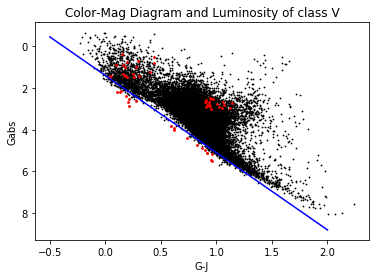

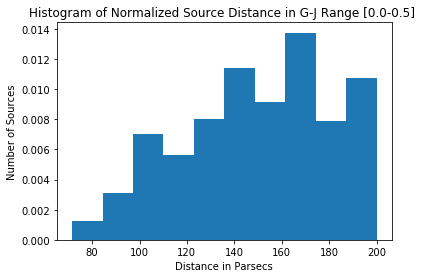

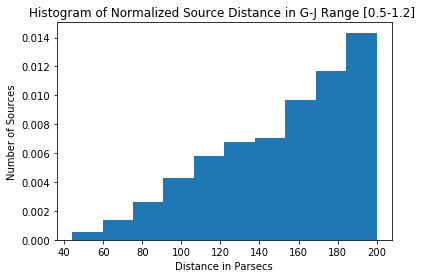

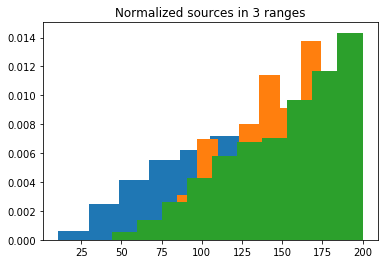

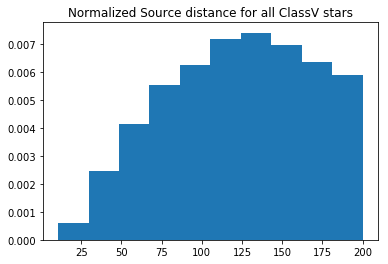

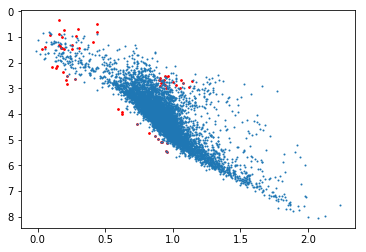

There are:  19641 Stars being used here


In [20]:
Teff = t['Teff']
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dist = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dist.append(dist[i])
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []


print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST                 RA                DEC         DIST')

G_1st = []
GJ_1st = []
G_2nd = []
GJ_2nd = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])

print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()
    
plt.title('Histogram of Normalized Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Normalized Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()
plt.title('Normalized sources in 3 ranges')
histbelow=plt.hist(all_dist,normed=True)
hist1st=plt.hist(dist_1st,normed=True)
plt.hist(dist_2nd,normed=True)
#plt.legend('Class V','1st Region','2nd Region')
plt.show()
plt.title('Normalized Source distance for all ClassV stars')
plt.hist(all_dist,normed=True)
plt.show()

for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 100):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)

plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.gca().invert_yaxis()
plt.show()
print('There are: ',count, 'Stars being used here')

In [9]:
print(len(RA_first))

1091


In [153]:
totalMags = np.array([totalB,totalV,totalG,totalJ,totalH,totalK])

#plt.scatter(totalMags[0][0:])
print(totalMags[:,12])
print(totalMags[:,12][2]-totalMags[:,12][5])

[ 1.13198906  1.08665074  1.09707195  0.92395071  0.93862775  0.89636776]
0.200704184789


In [133]:
array = [[1,2,3],[4,5,6]]
print(array[0:3][0:1])

[[1, 2, 3]]


In [57]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
totalRelB = ([])
totalRelV = ([])
totalRelK = ([])
totalRelH = ([])
totalRelJ = ([])
totalRelG = ([])
Bstd = []
Vstd = []
Kstd = []
Hstd = []
Jstd = []
Gstd = []
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Bstd.append(np.nanstd(BmagV))
    Vstd.append(np.nanstd(VmagV))
    Hstd.append(np.nanstd(HmagV))
    Jstd.append(np.nanstd(JmagV))
    Kstd.append(np.nanstd(KmagV))
    Gstd.append(np.nanstd(GmagV))
    totalRelB.append(MeanBmag)
    totalRelG.append(MeanGmag)
    totalRelV.append(MeanVmag)
    totalRelH.append(MeanHmag)
    totalRelK.append(MeanKmag)
    totalRelJ.append(MeanJmag)
    #print(MeanBmag)
    Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
    

In [55]:
print(totalRelB)

[-2.091311770600158, -1.6942293482615536, -1.380323401284874]


In [29]:
print((totalTemp))

[4268.2022471910113, 4781.5254237288136, 5191.283185840708, 5788.2507739938083, 6316.1147482442566, 6889.9280810722457, 7201.1148272017836, 7847.7671451355664, 8194.3298969072166, 8819.509981851179, 9224.1970802919714, 9520.0, 10500.0]


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


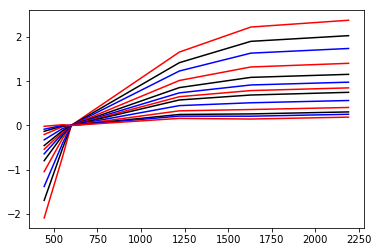

In [8]:
from matplotlib.pyplot import *

totalRelMags = np.array([totalRelB,totalRelV,totalRelG,totalRelJ,totalRelH,totalRelK])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
#plt.scatter(totalMags[0][0:])
for i in range(len(temps)):
    plt.plot(EffWave,totalRelMags[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
    
plt.show()


In [58]:
Uncert = 0.1
ChiVal = []

def ChiSq(theory,data):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    #ChiG = []
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    for j in range(len(totalTemp)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV[j],data)
            ChiV.append([currentV,totalTemp[j]])
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK[j],data)
            ChiK.append([currentK,totalTemp[j]])
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH[j],data)
            ChiH.append([currentH,totalTemp[j]])
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ[j],data))
            ChiJ.append([currentJ,totalTemp[j]])
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB[j],data))
            ChiB.append([currentB,totalTemp[j]])
    #print(len(ChiV),len(ChiH))
    if(len(ChiB) == 0):
        Chi_minB.append('nan')
    else:
        Chi_minB.append(np.min(ChiB))
    if(len(ChiV) == 0):
        Chi_minV.append('nan')
    else:
        Chi_minV.append(np.min(ChiV))
    if(len(ChiH) == 0):
        Chi_minH.append('nan')
    else:
        Chi_minH.append(np.min(ChiH))
    if(len(ChiJ) == 0):
        Chi_minJ.append('nan')
    else:
        Chi_minJ.append(np.min(ChiJ))
    if(len(ChiK) == 0):
        Chi_minK.append('nan')
    else:
        Chi_minK.append(np.min(ChiK))

        
        
        

In [61]:
print(len(Chi_minK))

50093


In [41]:
all_RedChi = []
for i in range(len(Chi_minB)): 
    if('nan' not in str(Chi_minB[i]) and 'nan' not in str(Chi_minV[i]) and 'nan' not in str(Chi_minH[i]) and 'nan' not in str(Chi_minJ[i]) and 'nan' not in str(Chi_minK[i])):
        ChiSqu = Chi_minB[i]+Chi_minV[i]+Chi_minH[i]+Chi_minK[i]+Chi_minJ[i]
        RedChi = ChiSqu/4.0
        all_RedChi.append(RedChi)
    else:
        all_RedChi.append(.1)
print(np.mean(all_RedChi))
print(all_RedChi[4000:4020])


0.1
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [10]:
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(all_RedChi[i])
                    region1count = region1count + 1
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(all_RedChi[i])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(all_RedChi[i])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []


print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()

def Norm(data,max,min):
    norm = (data-min)/(max-min)
    return norm
Norm_Dist_1st = []
Norm_Dist_2nd = []
Norm_Dist_below = []
for j in range(len(G_1st)):
    Norm_Dist_1st.append(Norm(dist1,np.max(dist1),np.min(dist1)))
    Norm_Dist_2nd.append(Norm(dist2,np.max(dist2),np.min(dist2)))
    Norm_Dist_below.append(Norm(distBelow,np.max(distBelow),np.min(distBelow)))
plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()
histbelow=plt.hist(dist_below,normed=True)
hist1st=plt.hist(dist_1st,True)
plt.show()
classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,20)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
print(len(all_RedChi))
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(all_RedChi[i] <= 60.0 and dist[i] < 100.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i] - AbsJmag[i]
                G_Chi.append(Gvalue)
                GJ_Chi.append(GJvalue)
plt.title('H-R With Reduced Chi Sq <10.0')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJ_Chi,G_Chi,s=2.0)
plt.gca().invert_yaxis()
plt.show()

plt.title('Normalized Region 1 Distance histogram')
plt.hist(Norm_Dist_1st)
plt.show()

NameError: name 'all_RedChi' is not defined

44.9103 31.1111 36.0409 52.3163


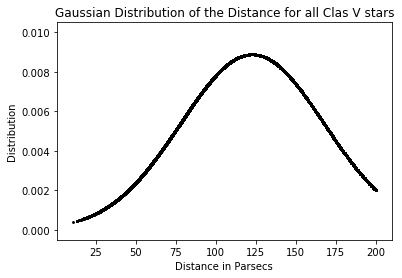

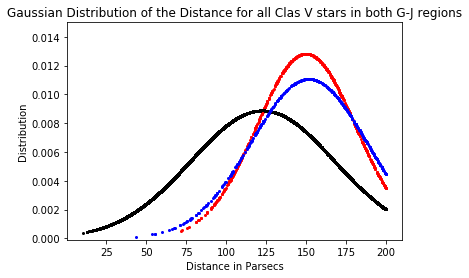

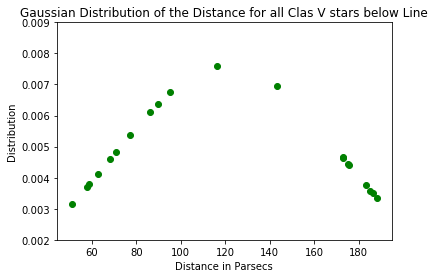

151.645
19641 623 465


In [56]:
#Statistical Analysis of the three regions
def Gauss(x,std,mu):
    value = (1/(np.sqrt(2*np.pi*std**2.0)))*np.exp(-(x-mu)**2.0/(2*std**2.0))
    return value

totalStd = np.std(all_dists)
Std1 = np.std(dist_1st)
Std2 = np.std(dist_2nd)
StdBelow = np.std(dist_below)
print(totalStd,Std1,Std2,StdBelow)
total_Mu = np.mean(all_dists)
Mu_1 = np.mean(dist_1st)
Mu_2 = np.mean(dist_2nd)
Mu_below = np.mean(dist_below)
DistSpreadtotal = []
DistSpread1st = []
DistSpread2nd = []
DistSpreadBelow = []

for i in range(0,len(all_dists)):
    DistSpreadtotal.append(Gauss(all_dists[i],totalStd,total_Mu))
plt.scatter(all_dists,DistSpreadtotal,s=2.0)
axes = plt.gca()
plt.title('Gaussian Distribution of the Distance for all Clas V stars')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
axes.set_ylim([-0.0005,0.0105])
plt.show()
for i in range(0,len(dist_1st)):
    DistSpread1st.append(Gauss(dist_1st[i],Std1,Mu_1))
axes = plt.gca()
axes.set_ylim([-0.0001,0.015])
# plt.scatter(dist_1st,DistSpread1st,s=3.0,c=r)
#plt.scatter(all_dists,DistSpreadtotal,s=3.0,c=k)
# plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c=b)
# plt.scatter(dist_below,DistSpreadBelow,s=3.0)
#plt.show()
for i in range(0,len(dist_2nd)):
    DistSpread2nd.append(Gauss(dist_2nd[i],Std2,Mu_2))
axes = plt.gca()
plt.title('Gaussian Distribution of the Distance for all Clas V Stars in region G-J[0.5-1.2]')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
#axes.set_ylim([-0.0001,0.015])
#plt.scatter(dist_2nd,DistSpread2nd,s=3.0)
#plt.show()
for i in range(0,len(dist_below)):
    DistSpreadBelow.append(Gauss(dist_below[i],StdBelow,Mu_below))
axes = plt.gca()
#axes.set_ylim([-0.0001,0.015])
#plt.scatter(dist_below,DistSpreadBelow,s=3.0)
#plt.show()
axes = plt.gca()
axes.set_ylim([-0.0001,0.015])
plt.title('Gaussian Distribution of the Distance for all Clas V stars in both G-J regions')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
plt.scatter(dist_1st,DistSpread1st,s=4.0,c='r')
plt.scatter(all_dists,DistSpreadtotal,s=4.0,c='k')
plt.scatter(dist_2nd,DistSpread2nd,s=4.0,c='b')
#plt.scatter(dist_below,DistSpreadBelow,c='g')
plt.show()
# plt.scatter(dist_1st,DistSpread1st,s=3.0,c='r')
# plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
# plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c='b')
#plt.scatter(dist_below,DistSpreadBelow,c='g')
#plt.show()
#plt.scatter(dist_1st,DistSpread1st,s=3.0,c='r')
#plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
#plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c='b')
plt.title('Gaussian Distribution of the Distance for all Clas V stars below Line')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
axes = plt.gca()
axes.set_ylim([0.002,0.009])
plt.scatter(dist_below,DistSpreadBelow,c='g')
plt.show()
print(Mu_2)
print(totalcount,region1count,region2count)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Warning: converting a masked element to nan.
  """Entry point for launching an IPython kernel.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


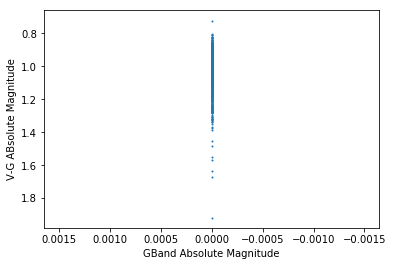

6
nan


In [52]:
VmG = np.array(JmagV) - np.array(GmagV)
plt.xlabel('GBand Absolute Magnitude')
plt.ylabel('V-G ABsolute Magnitude')
plt.scatter(GmagV,VmG,s=1.0)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

print(len(Mags))
print((MeanGmag))

In [52]:
print(GmagV[0:5])

[0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
# This cell contains old code. I do not want to erase it until I am 100% sure I do not require it. Once final SED
# models are complete, I will remove it
Teff = t['Teff']
Plx = t["Plx"]

temp = np.linspace(3500,10000,num=14)
print(temp)
#18 sets of ranges
tempRange = []
PlxRange = []
JmagRange = []
GmagRange = []
HmagRange = []
KmagRange = []
VmagRange = []
dist = []
Sp_str = str(Sp)

def AbsoluteMag(mag,dist):
    return mag - (5*np.log10(dist/10))

for low in temp:
    high = low + 500
    for i in range(0,len(Teff)):
        if(low <= Teff[i] <= high):
            if(Teff.mask[i] == False):
                tempRange.append(Teff[i])
                JmagRange.append(Jmag[i])
                GmagRange.append(Gmag[i])
                HmagRange.append(Hmag[i])
                KmagRange.append(Kmag[i])
                VmagRange.append(Vmag[i])
                PlxRange.append(Plx[i])
                dist.append(1000/Plx[i])
    #plt.hist(tempRange,bins=25)
    #TempValMask = ma.masked_outside(temp,low,high)
    #TempValComp = TempValMask.compressed()
    #plt.hist(TempValComp,bins=15)
    #plt.show()    
    for j in range(0,len(tempRange)):
        JmagRange[j] = AbsoluteMag(JmagRange[j],dist[j])
        GmagRange[j] = AbsoluteMag(GmagRange[j],dist[j])
        HmagRange[j] = AbsoluteMag(HmagRange[j],dist[j])
        KmagRange[j] = AbsoluteMag(KmagRange[j],dist[j])
        VmagRange[j] = AbsoluteMag(VmagRange[j],dist[j])
    print("There are ", len(tempRange), " stars in the range", low, " - ", high)
    print("\n","Mean: ", np.mean(tempRange))
    print("Standard Deviation: ", np.std(tempRange))
    print("Max: ", np.max(tempRange))
    print("Min: ", np.min(tempRange))
    print("\n")
    print("Standard Deviation for Absolute Jmag", np.std(JmagRange))
    #print("There are ", len(TempValComp), "in the range", low, " - ", high)
    #tempRange = []

[  3500.   4000.   4500.   5000.   5500.   6000.   6500.   7000.   7500.
   8000.   8500.   9000.   9500.  10000.]
There are  275  stars in the range 3500.0  -  4000.0

 Mean:  3920.14545455
Standard Deviation:  93.6180670562
Max:  4000
Min:  3530


Standard Deviation for Absolute Jmag 

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


nan
There are  1131  stars in the range 4000.0  -  4500.0

 Mean:  4259.34571176
Standard Deviation:  219.736430467
Max:  4420
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  6223  stars in the range 4500.0  -  5000.0

 Mean:  4673.33440463
Standard Deviation:  231.626417363
Max:  4900
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  10828  stars in the range 5000.0  -  5500.0

 Mean:  4883.65903214
Standard Deviation:  304.259629527
Max:  5500
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  15768  stars in the range 5500.0  -  6000.0

 Mean:  5168.48236936
Standard Deviation:  494.176794431
Max:  5860
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  36728  stars in the range 6000.0  -  6500.0

 Mean:  5786.07166195
Standard Deviation:  639.840071778
Max:  6470
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  41701  stars in the range 6500.0  -  7000.0

 Mean:  5917.38951104
Standard Deviation:  698.52497

In [45]:
test = 0
for i in range(0,len(Teff)):
    if(str(SpV) in str(Sp[i])):
        if(5000.0 <= Teff[i] <= 5500.0):
            test = test + 1
        
print(test)
      

KeyboardInterrupt: 